# Transformaciones matriciales en Python

*Matrices y Machine Learning: Sesión 2.1*

Hasta el momento, definimos una operación nueva que es el *producto matriz-vector*, pero cada vez que definimos una operación, deberíamos hacernos una intuición de cómo se comporta, al menos en los escenarios más simples. Ese es el objetivo de este notebook: Darnos una sensación del alcance que tienen las matrices al actuar sobre los vectores. Para esto, primero partamos entendiendo cómo graficar vectores en `python`.



In [1]:
from matplotlib import pyplot as plt
import numpy as np

## 1. Graficar vectores utilizando `matplotlib`

En otros notebooks he dado referencias a la librería que vamos a utilizar para hacer nuestros gráficos, por ahora, señalo que la función importante que utilizaremos será `plt.arrow(tail_x, tail_y, head_x, head_y)` para graficar las *flechas* que representarán a nuestros vectores.

La siguiente función `plot_vectors(vectors, color='blue')` recibe una lista de `python` cuyos elementos son vectores y los grafica. Te preguntarás *¿Y qué son los vectores en `python`?* La respuesta a eso la hablaremos en la siguiente sección, por ahora nota que lo único que hace la función con los elementos de la lista que recibe es acceder a sus dos elementos `vec[0]` y `vec[1]`, por lo que es razonable imaginarnos algo como
$$\text{\texttt{vec}} = \begin{pmatrix} x \\ y \end{pmatrix}$$

In [2]:
def plot_vectors(vectors, color='blue'):
    """Grafica los vectores entregados

    Args:
        vectors (list): Lista que contiene los vectores a graficar
        color (str, optional): Color a asignarle a los vectores. Defaults to 'blue'.
    """
    for vec in vectors:
        plt.arrow(0, 0, vec[0], vec[1], head_width=0.1, head_length=0.1, fc=color, ec=color)

Pongamos esta función a prueba con un par de vectores de muestra:

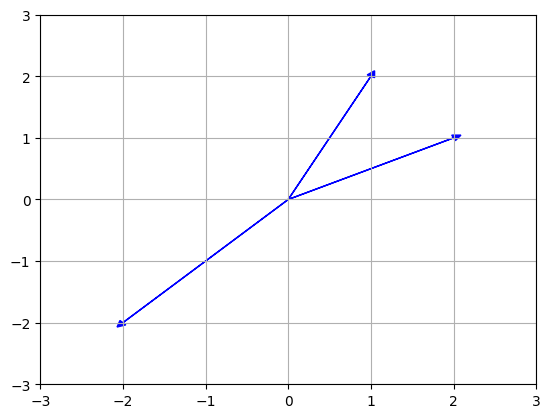

In [7]:
vectors = [
    [ 1,  2],  # vector 1
    [ 2,  1],  # vector 2
    [-2, -2]   # vector 3
]
# Nota. Aquí no estoy haciendo nada fancy para implementar los vectores. Son solo listas con sus dos coordenadas, la forma más real la discutiremos en la siguiente sección.

plot_vectors(vectors, color='blue')
plt.xlim(-3, 3)  # rango para el eje X
plt.ylim(-3, 3)  # rango para el eje Y
plt.grid()  # grilla para el gráfico. Si quieres quita esta línea y ve qué ocurre

## 2. Matrices y vectores en `numpy`

En `python` hay muchas librerías dedicadas a cubrir diferentes aspectos de la ingeniería y la computación científica, a continuación doy los primeros ejemplos que se me ocurren: [SymPy para álgebra y cálculo simbólico](https://www.sympy.org/en/index.html), [SciPy para algoritmos de optimización y estadística](https://scipy.org), [FEniCS para resolución numérica de ecuaciones diferenciales](https://fenicsproject.org) y [PyTorch para machine learning](https://pytorch.org). Algo que todas estas librerías tienen en común es que están construídas alrededor de [numpy](https://numpy.org), que es la principal (y en realidad única) librería numérica de `python` (ver [aquí](https://numpy.org/case-studies/blackhole-image/) un ejemplo interesante, entiendo que parte de esto se hizo en Chile). Es decir, si bien el lenguaje por si solo contiene la posibilidad de hacer cálculos simples, es `numpy` el que los puede realizar con un rendimiento comparable a lenguajes de programación más complejos, por lo que todas las librerías de `python` que hacen trabajo numérico serio están construidas alrededor de `numpy`. Y el objeto fundamental de `numpy` son sus vectores, o como ellos los llaman `arrays`.

En su expresión más simple, un vector de `numpy` es una lista:

In [8]:
x = np.array([1, 2, 3])

Pero con la salvedad de que contrario a las listas de `python`, no se pueden extender:

In [9]:
x.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Y están pensados para tener un solo tipo de dato:

In [12]:
x = np.array([1, "hola", 2])
print(x)  # Notarás que convirtió los números en '1' y '2', en vez de dejarlos como números

['1' 'hola' '2']


Esto podría parecer más restrictivo y por lo tanto menos útil, pero es precisamente lo que permite que los cálculos funcionen tan rápido. Es un intercambio de flexibilidad por rendimiento. Y de todos modos al operar con vectores nunca vamos a necesitar extenderlos ni trabajar con tipos de dato no numéricos, por lo que esa es flexibilidad que en este contexto se puede sacrificar.

**ya pero... ¿Y las matrices?**

Las matrices son listas de listas, en que sus entradas las estamos escribiendo por filas, como sigue:

In [14]:
A = np.array([
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3]
])

Por lo que podemos definir un vector y hacer el producto matriz-vector con el operador `@`

In [16]:
x = np.array([1, 1, 1])
A @ x  # Da lo que esperamos que de (Verifica!).
# Nota, también se puede hacer el mismo producto con A.dot(x) si prefieres.

array([1, 2, 3])

También es posible acceder a las entradas, filas y columnas de una matriz con una notación muy similar a la que utilizamos en los apuntes:

In [18]:
print(A[1, 1])
print(A[:, 1])
print(A[2, :])

2
[0 2 0]
[0 0 3]


Aquí te aconsejo experimentar lo que haga falta con estas funciones, quizá podrías verificar tus resultados de la tarea teórica con esto.

In [ ]:
## Celda para experimentar :)

## 3. Grafiquemos lo que estamos haciendo

Vamos a trabajar en $\R^2$. Es decir, con solo vectores de dos dimensiones. Y vamos a definir la siguiente lista con vectores de prueba:

In [19]:
vectors = [
    np.array([ -2, -2]),
    np.array([ -2, -1]),
    np.array([ -2,  0]),
    np.array([ -2,  1]),
    np.array([ -2,  2]),
    np.array([ -1, -2]),
    np.array([ -1, -1]),
    np.array([ -1,  0]),
    np.array([ -1,  1]),
    np.array([ -1,  2]),
    np.array([  0, -2]),
    np.array([  0, -1]),
    np.array([  0,  0]),
    np.array([  0,  1]),
    np.array([  0,  2]),
    np.array([  1, -2]),
    np.array([  1, -1]),
    np.array([  1,  0]),
    np.array([  1,  1]),
    np.array([  1,  2]),
    np.array([  2, -2]),
    np.array([  2, -1]),
    np.array([  2,  0]),
    np.array([  2,  1]),
    np.array([  2,  2])
]
# Por supuesto que hay una forma más inteligente de hacer esto, pero la función quedaría difícil de entender.

Grafiquemos estos vectores:

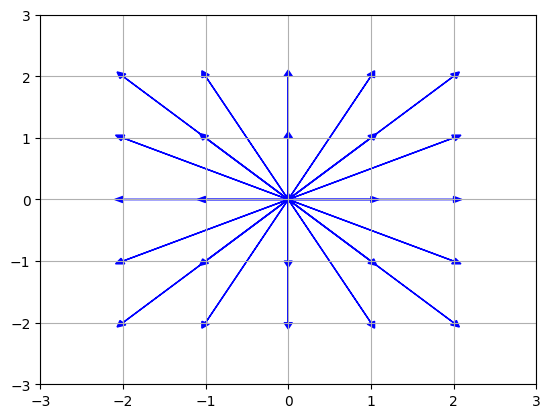

In [20]:
plot_vectors(vectors, color='blue')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()

**Ejercicio 1:** Consideremos la siguiente matriz:

$$\begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}$$

Nos interesa saber cómo esta matriz *transforma el espacio*, cosa que podemos entender a partir de aplicarla sobre los vectores y graficar el resultado. Haga eso a continuación y grafique en verde los vectores resultantes.

*Nota:* No modifique la lista `vectors` ya que vamos a utilizar estos vectores varias veces. Se recomienda crear una lista nueva para almacenar los resultados.

In [24]:
# Código aquí.

**Ejercicio 2:** Dado $\theta \in \R$, consideremos la siguiente matriz:

$$\begin{pmatrix} \cos(\theta) &  -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{pmatrix}$$

Repita lo hecho anteriormente para esta matriz con los mismos vectores y para los valores $\theta = \frac{\pi}{6}, \frac{\pi}{4}, \frac{\pi}{3}$.

**Nota:** El número $\pi$ está implementado en `numpy` como `np.pi`. Similarmente, las funciones trigonométricas están implementadas como `np.cos()` y `np.sin()`.

In [ ]:
# Código aquí.

**Ejercicio 3:** Experimente libremente con matrices de su elección y responda a la siguiente pregunta: *¿Qué propiedades geométricas parecen preservarse al aplicar una matriz sobre todo el espacio?* En busca de inspiración, le aconsejo utilizar matrices de este estilo:
$$\begin{pmatrix} a & 0 \\ 0 & b \end{pmatrix}$$
Sin dejar de lado casos como $a = 0$ para distintos valores de $b$ o viceversa. 